# Primero nos conectamos a google drive para obtener el dataset

In [52]:
from google.colab import drive

drive.mount("/content/gdrive")
!pwd  # show current path

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/ITESM ITC/Septimo semestre/Datasets


ahora vamos a cambiar de directorio para acceder a la carpeta donde se encuentra nuestro dataset. Para este entregable decidí hacer el challenge de valhalla con una solución de regresión lineal

In [53]:
%cd "/content/gdrive/MyDrive/ITESM ITC/Septimo semestre/Datasets"
!ls  # show current directory

/content/gdrive/MyDrive/ITESM ITC/Septimo semestre/Datasets
amazon_product.csv  iris.data  mc-donalds-menu.csv  titanic  Valhalla23.csv  wine.data	wine.names


En esta sección vamos a importar todas las librerias que vamos a necesitar

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split #se usa para dividir un conjunto de datos en dos subconjuntos: entrenamiento y prueba.
from sklearn.linear_model import SGDRegressor # implementa un modelo de regresión lineal utilizando un algoritmo de descenso de gradiente estocástico.
from sklearn.metrics import mean_squared_error #Función para calcular el error cuadrático medio (MSE), una métrica que mide el rendimiento de un modelo de regresión.
import matplotlib.pyplot as plt #se utiliza para crear visualizaciones de datos en Python.
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Ahora, vamos a cargar el archivo

In [55]:
valhalla = pd.read_csv("Valhalla23.csv")
valhalla.head()

,Celsius,Valks
0,61.4720,-139.740
1,70.5790,-156.600
2,-7.3013,73.269
3,71.3380,-165.420
4,43.2360,-75.835


dividimos el dataset en sus caracteristicas "x" y "y"

In [56]:
X = valhalla[['Celsius']] #dejamos el doble corchete para que se mantenga como un dataframe (en lugar de una serie de pandas)
y = valhalla['Valks']

Vamos a graficarlo para ver si existe alguna relación entre las dos variables que se pueda observar a simple vista

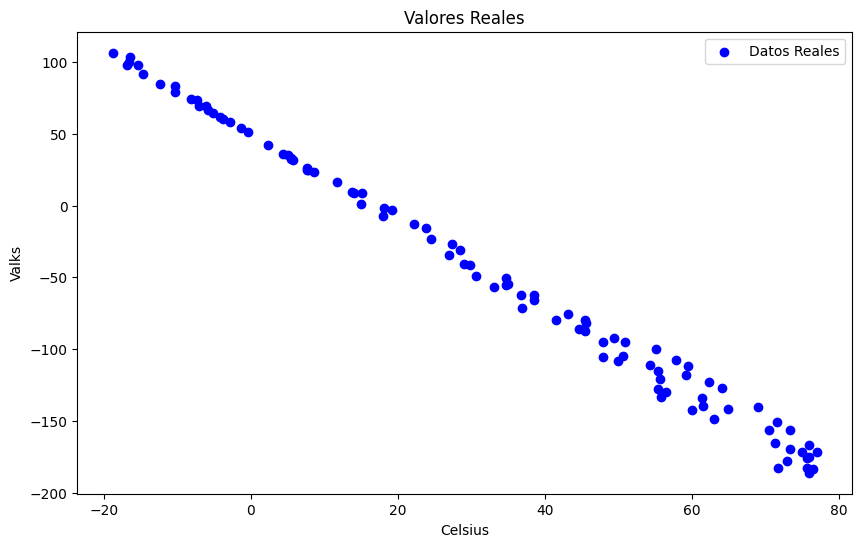

In [57]:
plt.figure(figsize=(10, 6))

plt.scatter(X, y, color='blue', label='Datos Reales')

plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Valores Reales')
plt.legend()
plt.show()

# División de datos
dividimos los datos en dos subconjuntos, uno de prueba y otro de entrenamiento. En este caso se configuro para que el 20% de los datos sean de prueba y el 80% restante de entrenamiento. Se utilizo la semilla "42" para garantizar que la división sea reproducible.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Escalamiento de datos

hubo problemas utilizando el modelo  de regresión SGDR sin escalar los datos por lo que fue necesario escalarlos.

In [59]:
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador a los datos de entrenamiento y transformar tanto los datos de entrenamiento como los de prueba
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Configuración y entrenamiento


In [60]:
"""model = SGDRegressor(penalty='l2', alpha=0.01, max_iter=100, learning_rate='optimal', random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
"""
# Inicializar el modelo con los parámetros elegidos
model = SGDRegressor(penalty='l2', alpha=0.001, max_iter=10000, learning_rate='optimal', random_state=42)

# Ajustar el modelo a los datos de entrenamiento escalados
model.fit(X_train_scaled, y_train)



SGDRegressor(alpha=0.001, learning_rate='optimal', max_iter=10000,
             random_state=42)

SGDRegressor: Crea un modelo de regresión lineal que usa descenso de gradiente estocástico. La penalización l2 aplica regularización Ridge, max_iter=100 define que el modelo se entrenará por un máximo de 100 iteraciones, y learning_rate='optimal' ajusta automáticamente la tasa de aprendizaje.

model.fit:Entrena el modelo utilizando el conjunto de entrenamiento (X_train, y_train). El modelo ajusta sus parámetros para minimizar el error en estos datos.

# Evaluación del modelo

In [61]:

y_train_pred = model.predict(X_train_scaled) #Genera predicciones usando el modelo entrenado para los datos de entrenamiento.
y_test_pred = model.predict(X_test_scaled) #Genera predicciones usando el modelo entrenado para los datos de prueba.


#alcula el error cuadrático medio (MSE) para el conjunto de entrenamiento,
#comparando las predicciones (y_train_pred) con los valores reales (y_train).
train_mse = mean_squared_error(y_train, y_train_pred)

#Calcula el MSE para el conjunto de prueba, comparando las predicciones (y_test_pred)
#con los valores reales (y_test).
test_mse = mean_squared_error(y_test, y_test_pred)


#imprimimos los resultados de nuestras metricas
print(f"Error Cuadrático Medio en Entrenamiento: {train_mse}")
print(f"Error Cuadrático Medio en Prueba: {test_mse}")


Error Cuadrático Medio en Entrenamiento: 86.2761597182914
Error Cuadrático Medio en Prueba: 83.28345282977081


# Visualizacion de resultados


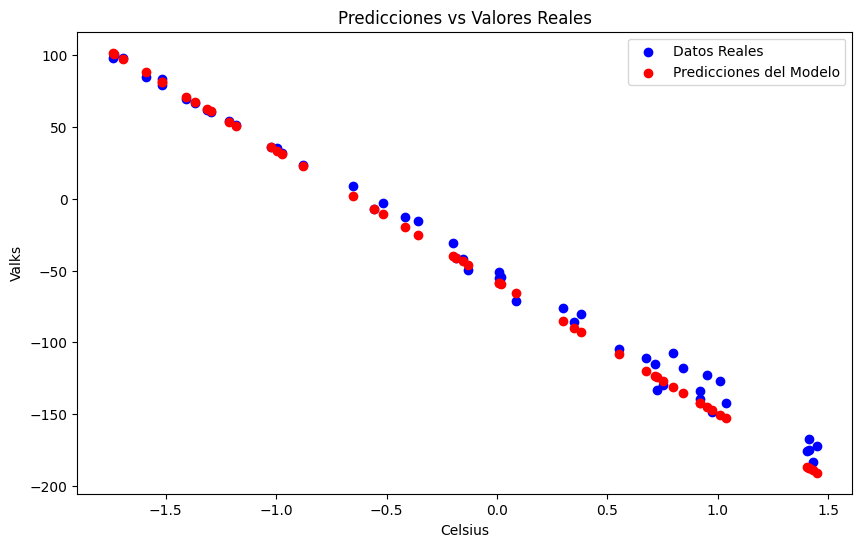

In [62]:
plt.figure(figsize=(10, 6))


plt.scatter(X_test_scaled, y_test, color='blue', label='Datos Reales')
plt.scatter(X_test_scaled, y_test_pred, color='red', label='Predicciones del Modelo')


plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()
